This is a test for our project

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Specify the folder where your CSV files are located
# #folder_path = '/Users/joshmccoy/Desktop/NCAA_March_Madness/march-machine-learning-mania-2023/ImportantCSVs'
# folder_path = '/Users/jimhaines/Desktop/Extra\ 1/CAPSTONE/CapstoneProject/mens-march-mania-2022/MDataFiles_Stage1'

# # Initialize an empty dictionary to store DataFrames with their file names as keys
# dataframes = {}

# # Iterate through all files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(folder_path, filename)
#         try:
#             # Try different encodings until one works
#             df = pd.read_csv(file_path, encoding='utf-8')
#         except UnicodeDecodeError:
#             try:
#                 df = pd.read_csv(file_path, encoding='latin1')
#             except:
#                 df = pd.read_csv(file_path, encoding='ISO-8859-1')
        
#         # Use the file name (without the .csv extension) as the DataFrame's name/key
#         dataframe_name = os.path.splitext(filename)[0]
#         dataframes[dataframe_name] = df

# # Now, you have a dictionary where keys are the CSV file names (without .csv extension)
# # and values are the corresponding DataFrames for all CSV files in the folder.

In [19]:
# # Access the "MRegularSeasonDetailedResults" DataFrame from the dictionary
# m_regular_season_df = dataframes.get("MRegularSeasonDetailedResults")
# m_regular_season_df

# # Now, you have the "m_regular_season_df" DataFrame that corresponds to the "MRegularSeasonDetailedResults.csv" file

In [22]:
detailed_results_data = 'MRegularSeasonDetailedResults.csv'
detailed_results = pd.read_csv(detailed_results_data)
detailed_results

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,98,1400,79,1242,76,H,0,28,67,...,13,15,23,5,24,10,15,3,5,21
100419,2022,98,1411,66,1126,63,A,0,24,59,...,21,15,24,5,23,10,19,13,2,23
100420,2022,98,1422,68,1441,49,A,0,23,56,...,24,8,11,10,18,5,16,8,2,12
100421,2022,98,1438,69,1181,68,A,0,31,65,...,17,18,22,11,25,14,14,3,9,11


In [23]:
# Winning stats
detailed_results.dtypes
detailed_results['WFGPCT'] = detailed_results['WFGM']/detailed_results['WFGA']
detailed_results['W3PCT'] = detailed_results['WFGM3']/detailed_results['WFGA3']
detailed_results['WFTPCT'] = detailed_results['WFTM']/detailed_results['WFTA']

detailed_results['WORBCHANCE'] =  detailed_results['WOR'] + detailed_results['LDR'] # winner offenside rebound
detailed_results['WORPCT'] = detailed_results['WOR']/detailed_results['WORBCHANCE']

In [24]:
# Losing stats
detailed_results['LFGPCT'] = detailed_results['LFGM']/detailed_results['LFGA']
detailed_results['L3PCT'] = detailed_results['LFGM3']/detailed_results['LFGA3']
detailed_results['LFTPCT'] = detailed_results['LFTM']/detailed_results['LFTA']

detailed_results['LORBCHANCE'] =  detailed_results['LOR'] + detailed_results['WDR']
detailed_results['LORPCT'] = detailed_results['LOR']/detailed_results['LORBCHANCE']

detailed_results['SCOREDIFF'] = detailed_results['WScore'] - detailed_results['LScore']

<AxesSubplot:>

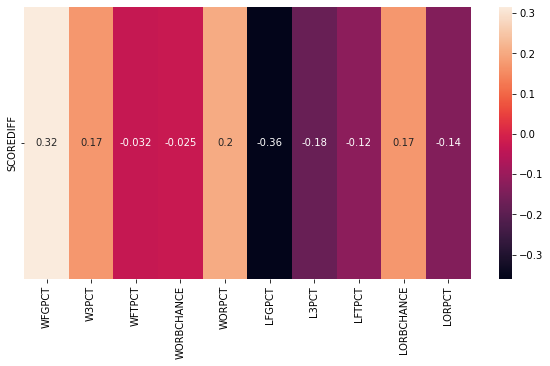

In [25]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 5))
tmp = detailed_results[(detailed_results['SCOREDIFF']>6)&(detailed_results['NumOT']==0)]
corr = tmp.corr()
corr = corr[corr.index.isin(['SCOREDIFF'])]
sns.heatmap(corr[['WFGPCT', 'W3PCT', 'WFTPCT', 'WORBCHANCE', 'WORPCT', 'LFGPCT', 'L3PCT', 
                  'LFTPCT', 'LORBCHANCE', 'LORPCT']], annot=True)

